# The Neural Code: Exercises 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import scipy.stats
from scipy.signal import convolve2d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

__Exercise 1: Convolution as Filter__

(a) Load the fluoresence trace exampleCAtrace.npy from a calcium imaging experiment and plot it
with the appropriate time axis (sampling frequency is 20 Hz).

<IPython.core.display.Javascript object>


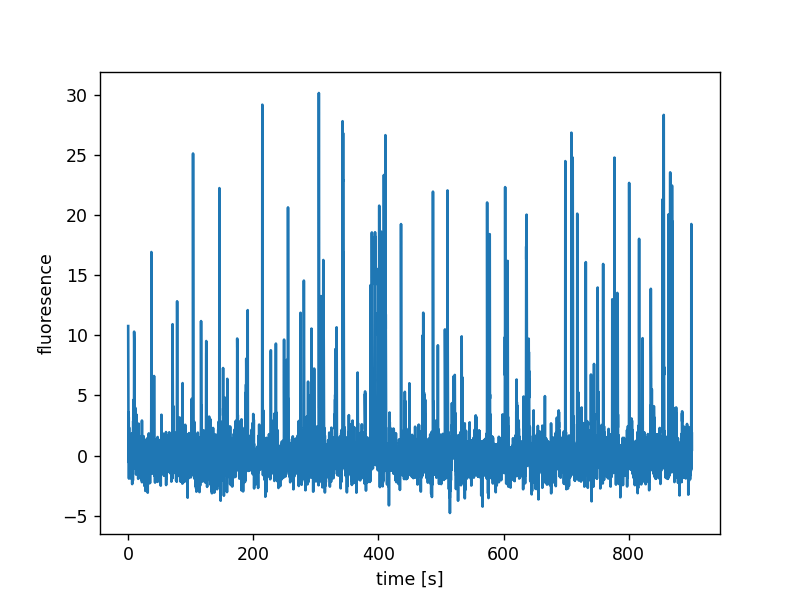

Text(0, 0.5, 'fluoresence')

In [2]:
fluorescence = np.load('exampleCAtrace.npy')
time_axis = np.arange(0, len(fluorescence) * (1/20), 1/20)

plt.figure()
plt.plot(time_axis, fluorescence)
plt.xlabel('time [s]')
plt.ylabel('fluoresence')

(b) Let's now focus on a small snippet from sample 1000 to 2000, which contains three visible tran-
sients.

<IPython.core.display.Javascript object>


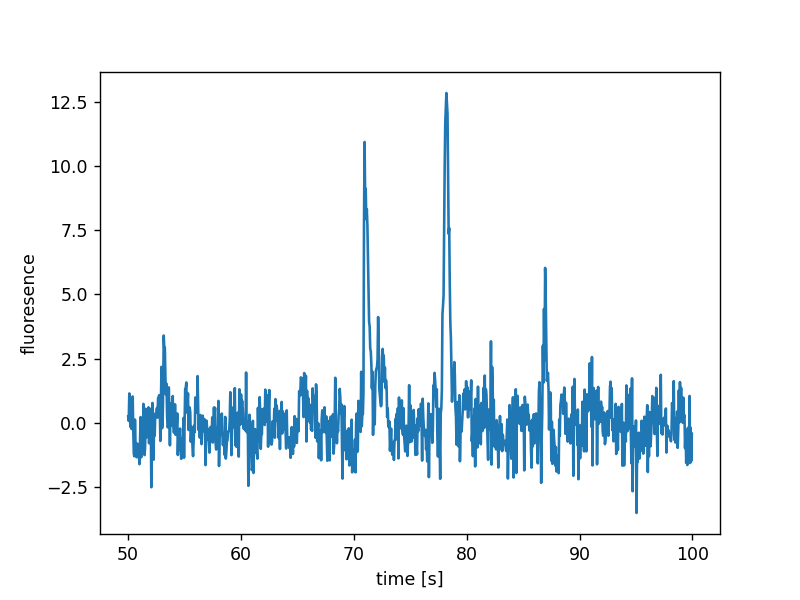

Text(0, 0.5, 'fluoresence')

In [3]:
fluorescence_snip = fluorescence[1000:2000]
time_axis_snip = time_axis[1000:2000]

plt.figure()
plt.plot(time_axis_snip, fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('fluoresence')

(c) Convolve the snippet with a Gaussian kernel with $\sigma = 250 ms$ and interpret its action.

<IPython.core.display.Javascript object>


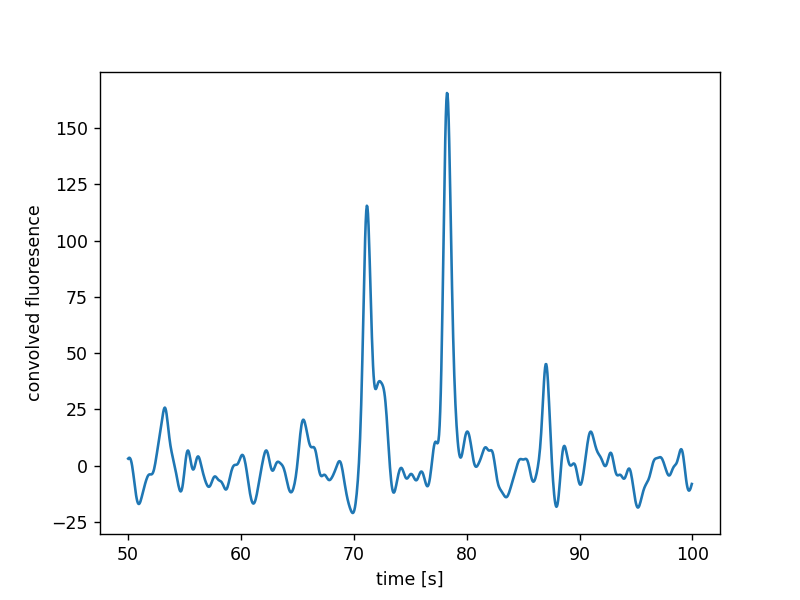

Text(0, 0.5, 'convolved fluoresence')

In [4]:
t = np.arange(50, 100, 1/20)

mean = 75
sigma = 0.25

gaussian = scipy.stats.norm(mean, sigma).pdf(t)

convolved_fluorescence_snip = np.convolve(fluorescence_snip, gaussian, mode = 'same')

plt.figure()
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')

The gaussian kernel smoothes the fluorescence curve.

(d) Change $\sigma$ and explore the effect.

<IPython.core.display.Javascript object>


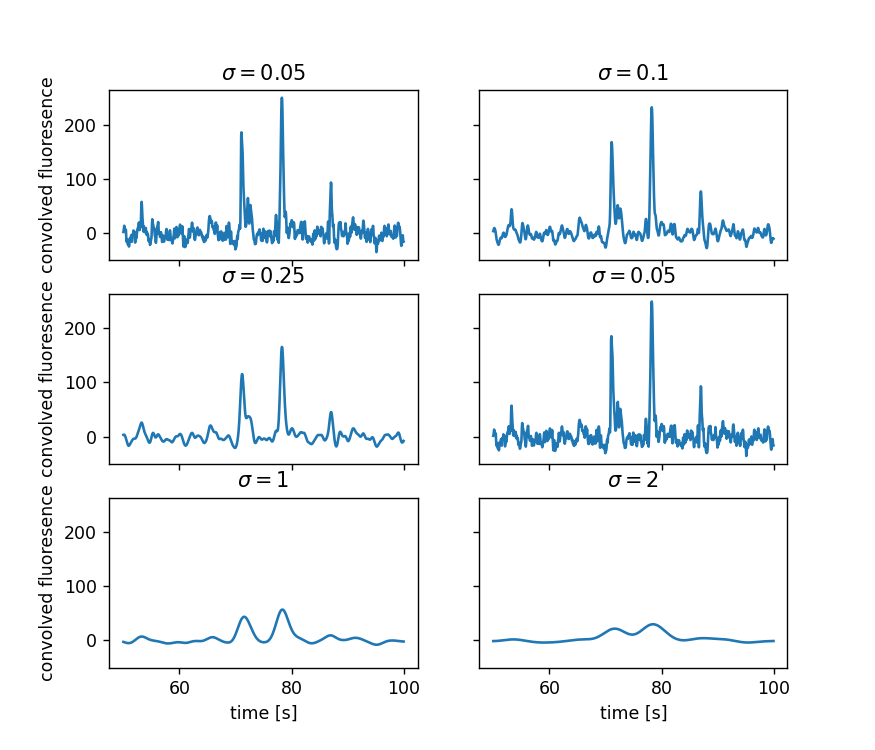

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [5]:
sigmas = [0.05, 0.1, 0.25, 0.05, 1, 2]

t = np.arange(50, 100, 1/20)
mean = 75

fig, ax = plt.subplots(3, 2, figsize = (7, 6), sharex = True, sharey = True)
ax = ax.reshape(-1)

for i in range(len(sigmas)):
    sigma = sigmas[i]
    gaussian = scipy.stats.norm(mean, sigma).pdf(t)
    convolved_fluorescence_snip = np.convolve(fluorescence_snip, gaussian, mode = 'same')
    ax[i].plot(time_axis_snip, convolved_fluorescence_snip)
    if i == 4 or i == 5:
        ax[i].set_xlabel('time [s]')
    if i % 2 == 0:
        ax[i].set_ylabel('convolved fluoresence')
    ax[i].set_title('$\sigma = {}$'.format(sigma))
plt.tight_layout

(e) Next generate a new kernel by multiplying the Gaussian kernel ($\sigma = 250 ms$) with $-sin(2 \pi t)$ and
plot the convolution. Why is the convolution approximating a differentiation?

<IPython.core.display.Javascript object>


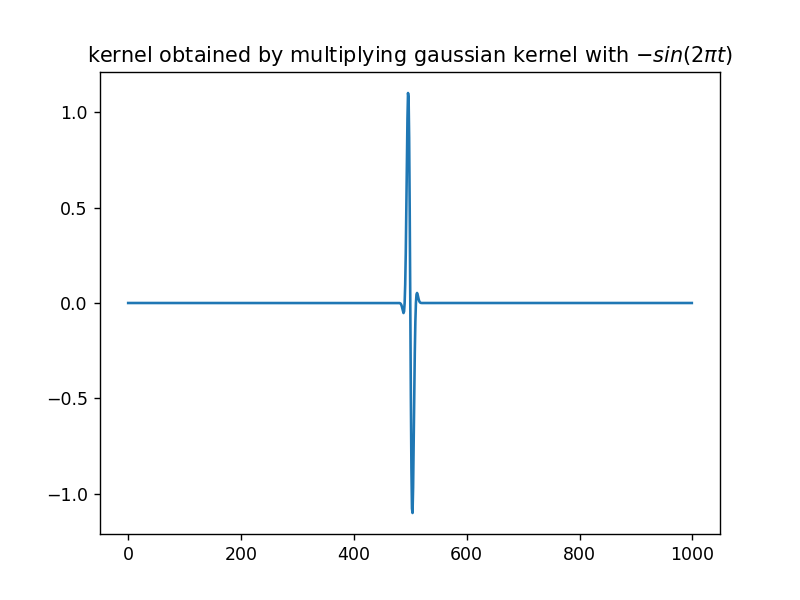

Text(0.5, 1.0, 'kernel obtained by multiplying gaussian kernel with $-sin(2 \\pi t)$')

In [6]:
t = np.arange(50, 100, 1/20)

mean = 75
sigma = 0.25

gaussian = scipy.stats.norm(mean, sigma).pdf(t)
sin = -np.sin(2 * np.pi * t)

first_derivative_kernel = gaussian * sin

plt.figure()
plt.plot(first_derivative_kernel)
plt.title('kernel obtained by multiplying gaussian kernel with $-sin(2 \pi t)$')

<IPython.core.display.Javascript object>


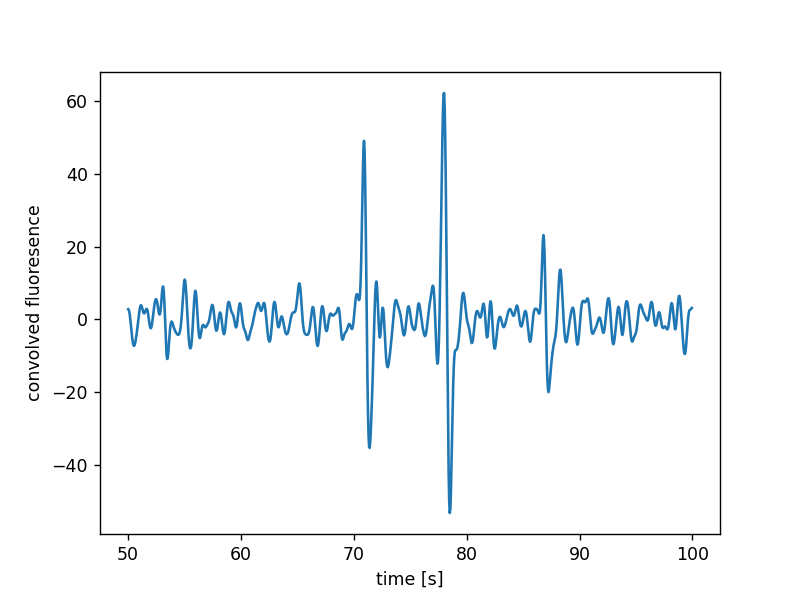

Text(0, 0.5, 'convolved fluoresence')

In [7]:
convolved_fluorescence_snip = np.convolve(fluorescence_snip, first_derivative_kernel, mode = 'same')

plt.figure()
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')

It is approximating a differentation because the large positive peak of the kernel 'caputures' rising slopes and the large negative peak falling slopes.

(f) Construct a kernel that approximates a second derivative and verify.

<IPython.core.display.Javascript object>


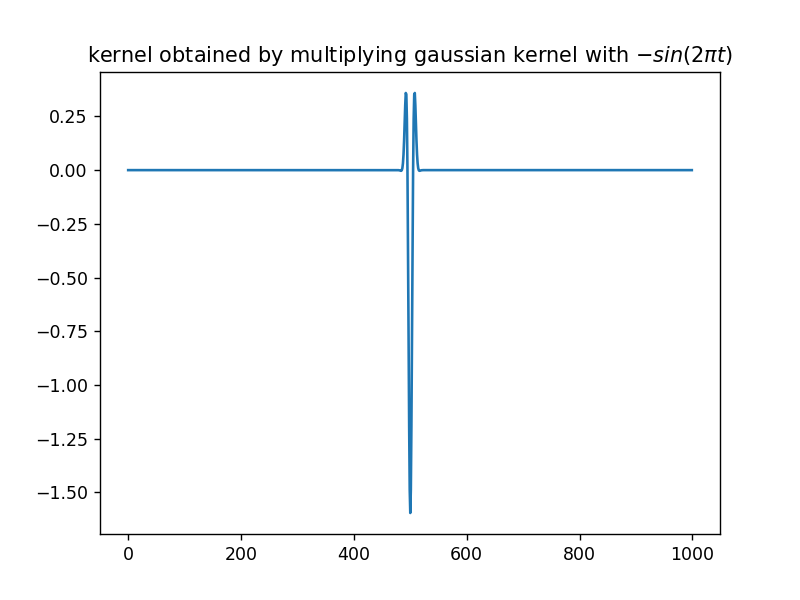

Text(0.5, 1.0, 'kernel obtained by multiplying gaussian kernel with $-sin(2 \\pi t)$')

In [8]:
t = np.arange(50, 100, 1/20)

mean = 75
sigma = 0.25

gaussian = scipy.stats.norm(mean, sigma).pdf(t)
sin = -np.sin((2 * np.pi * t) + np.pi/2)

second_derivative_kernel = gaussian * sin

plt.figure()
plt.plot(second_derivative_kernel)
plt.title('kernel obtained by multiplying gaussian kernel with $-sin(2 \pi t)$')

<IPython.core.display.Javascript object>


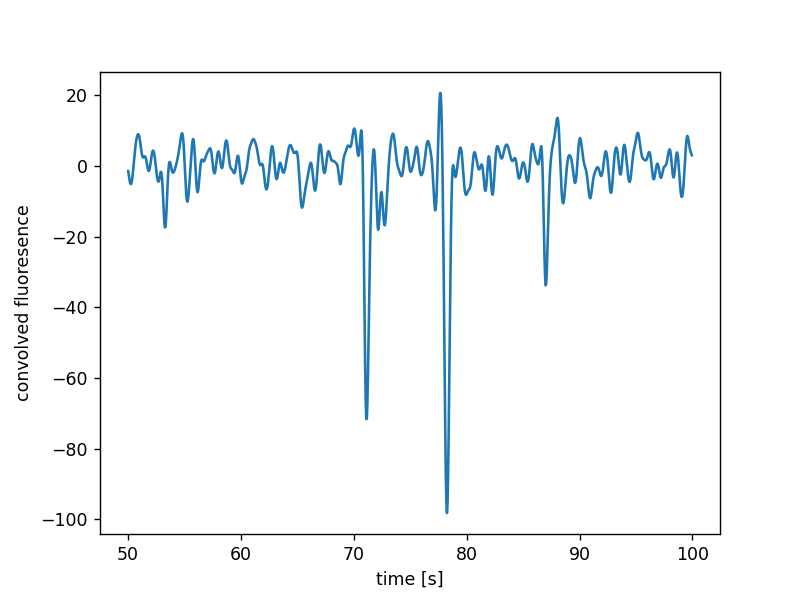

Text(0, 0.5, 'convolved fluoresence')

In [9]:
convolved_fluorescence_snip = np.convolve(fluorescence_snip, second_derivative_kernel, mode = 'same')

plt.figure()
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')

<IPython.core.display.Javascript object>


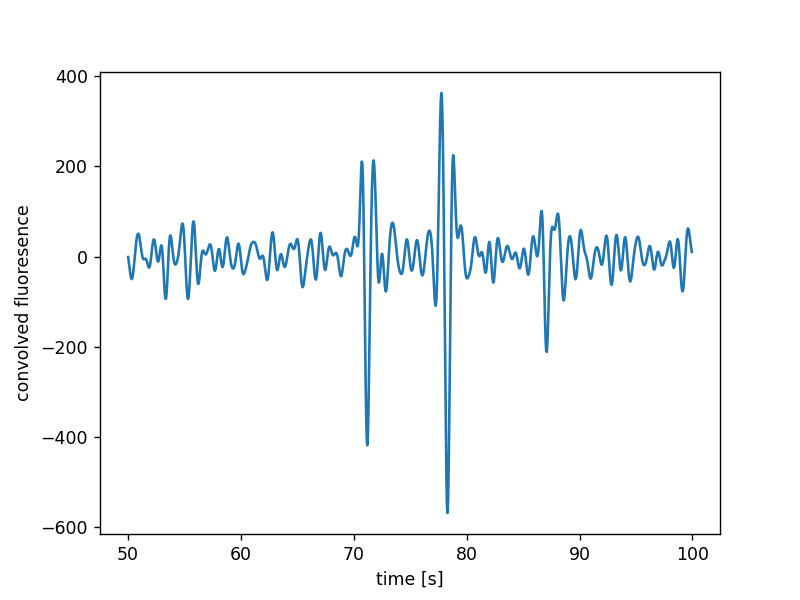

Text(0, 0.5, 'convolved fluoresence')

In [10]:
second_derivative_kernel = np.convolve(first_derivative_kernel, first_derivative_kernel, mode = 'same')

convolved_fluorescence_snip = np.convolve(fluorescence_snip, second_derivative_kernel, mode = 'same')

plt.figure()
plt.plot(time_axis_snip, convolved_fluorescence_snip)
plt.xlabel('time [s]')
plt.ylabel('convolved fluoresence')

<IPython.core.display.Javascript object>


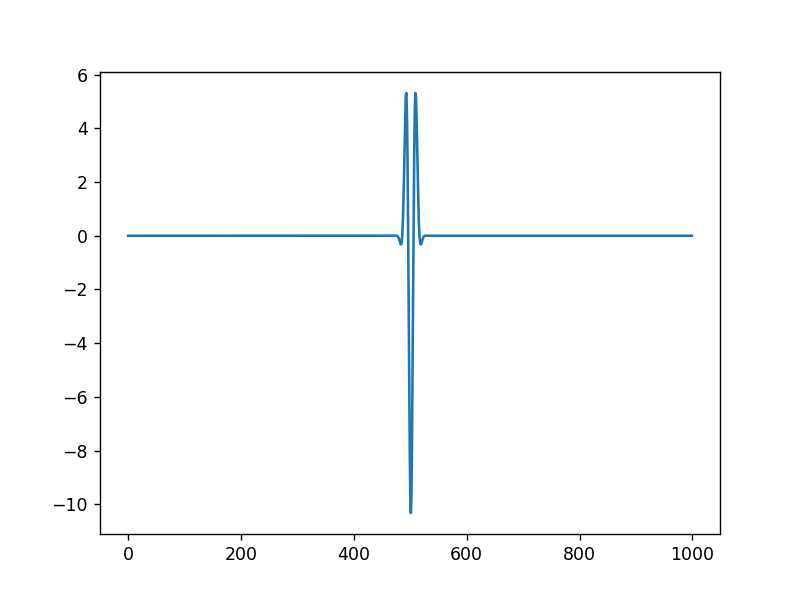

In [11]:
plt.figure()
plt.plot(second_derivative_kernel)

__Exercise 2: Image filters__

(a) Load the image freiburg.jpeg with img=matplotlib.image.imread(....), average over the
three color channels (img = np.mean(np.array(img),axis=2)) and plot (matplotlib.pyplot.imshow).

<IPython.core.display.Javascript object>


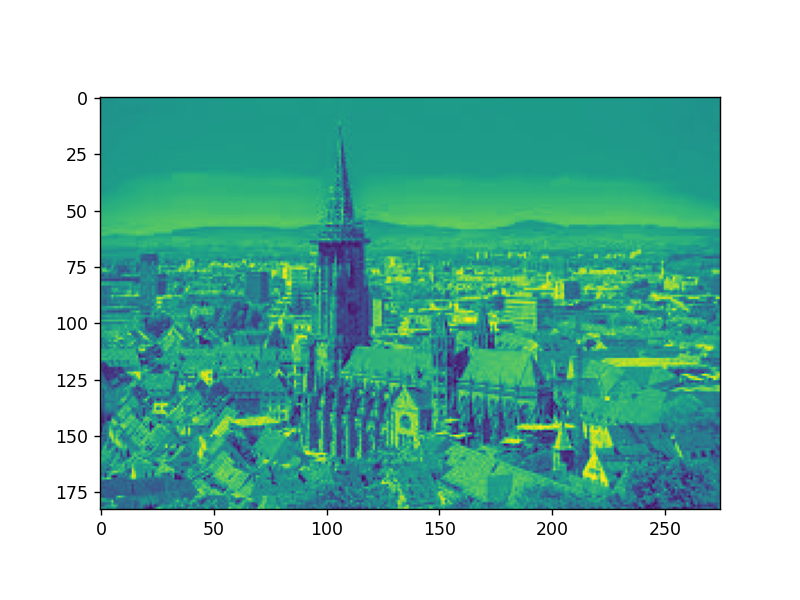

In [12]:
img=image.imread('freiburg.jpeg')

plt.figure()
img = np.mean(np.array(img), axis=2)
plt.imshow(img)

(b) Generate a 2-d Gaussian kernel $\sigma = 5$ pixels (check out numpy.mgrid) and convolve the image
(use from scipy.signal import convolve2d) to obtain a blurred image.

In [13]:
X, Y = np.mgrid[0:img.shape[0], 0:img.shape[1]]
mean_x = 91
mean_y = 137
sigma = 5

Z = np.zeros((img.shape[0], img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        Z[i, j] = scipy.stats.multivariate_normal.pdf([X[i, j], Y[i, j]], [mean_x, mean_y], [sigma, sigma])

<IPython.core.display.Javascript object>


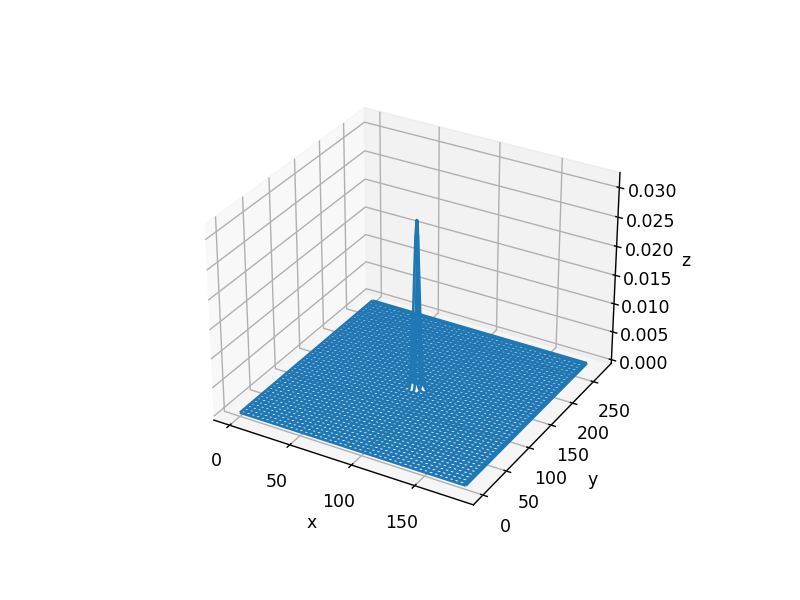

Text(0.5, 0, 'z')

In [14]:
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X = X, Y = Y, Z = Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<IPython.core.display.Javascript object>


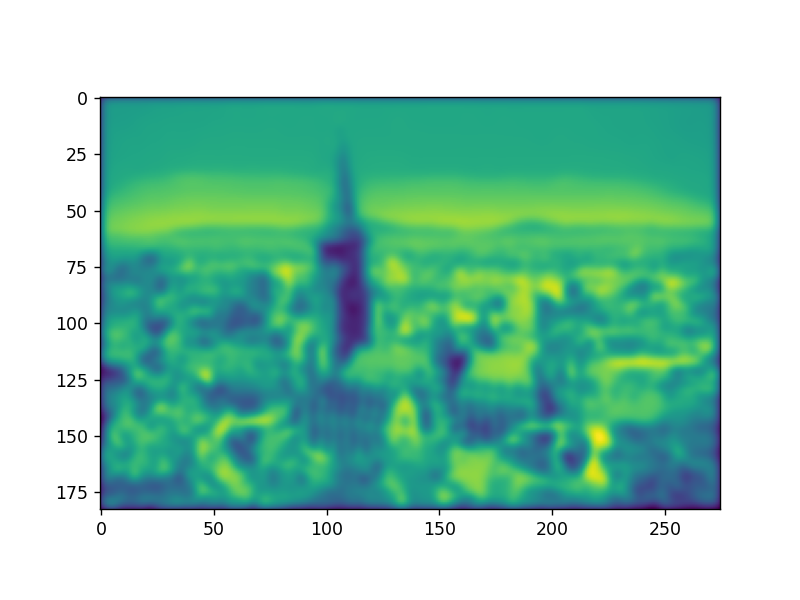

In [15]:
convolved_img = convolve2d(img, Z, mode = 'same')

plt.figure()
plt.imshow(convolved_img)

(c) Next, write a function that implements a Gabor kernel.

In [ ]:
def gabor(x, sigma, k, phi):
    result = np.exp((- x ** 2) / (2 * sigma ** 2)) * np.cos(k * x - phi)
    return result

In [ ]:
phi_values = [0, np.pi/2, np.pi, np.pi + np.pi/2, 2*np.pi]
k_vectors = [0.5 * np.array([np.cos(i), np.sin(i)]) for i in phi_values]
sigma = 5

In [ ]:
fig, ax = plt.subplots(5, 5, figsize = (10, 10))
for k in range(len(phi_values)):
    for l in range(len(k_vectors)):
        G_array = np.zeros((img.shape[0], img.shape[1]))
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                G_array[i, j] = gabor(np.array([X[i, j], Y[i, j]]), sigma, k_vectors[l], phi_values[k])
        #sns.heatmap(I_array, ax = ax[k,l], xticklabels = z_values, yticklabels = phi_values, cmap = 'mako')
        #ax[k,l].set_xlabel('$z$')
        #ax[k,l].set_ylabel('$\phi$')
        #ax[k,l].set_title('$\sigma_0 = {}$ and $\sigma_1 = {}$'.format(sigma0_values[k], sigma1_values[l]))
        #n = len(z_values) // 4
        #[label.set_visible(False) for (index,label) in enumerate(ax[k,l].xaxis.get_ticklabels()) if index % n != 0]
        #n = len(phi_values) // 4
        #[label.set_visible(False) for (index,label) in enumerate(ax[k,l].yaxis.get_ticklabels()) if index % n != 0]
        #ax[k,l].tick_params(bottom = False, left = False)
plt.tight_layout()

In [ ]:
G_array[i, j] = gabor(np.array([X[2, j], Y[2, j]]), sigma, k_vectors[l], phi_values[k])

In [ ]:
gabor(np.array([X[2, j], Y[2, j]]), sigma, k_vectors[l], phi_values[k])[0]